In [68]:
import pandas as pnd #para manejar el dataframe
import numpy as np #para abrir el csv
import matplotlib.pyplot as plt #para graficar 
import sklearn as sk #para normalizar los datos
from sklearn.cluster import KMeans

In [69]:
X = pnd.read_csv("viviendas2015-clean.csv")
X.head()

,Unnamed: 0,Unnamed: 0.1,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun
0,0,0,5,2,1,1,1,1,1,4,1,1,1,1
1,1,1,1,3,1,1,1,1,1,7,1,1,1,1
2,2,2,3,3,1,1,1,1,1,8,1,1,1,1
3,3,3,4,3,1,1,1,1,1,5,1,1,1,1
4,4,4,5,3,1,1,1,1,1,6,1,1,1,1


In [70]:
X.drop('Unnamed: 0', 1, inplace=True)
X.drop('Unnamed: 0.1', 1, inplace=True)

In [71]:
X.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun
0,5,2,1,1,1,1,1,4,1,1,1,1
1,1,3,1,1,1,1,1,7,1,1,1,1
2,3,3,1,1,1,1,1,8,1,1,1,1
3,4,3,1,1,1,1,1,5,1,1,1,1
4,5,3,1,1,1,1,1,6,1,1,1,1


In [72]:
X = sk.preprocessing.normalize(X, norm='l2', axis=1, copy=True)

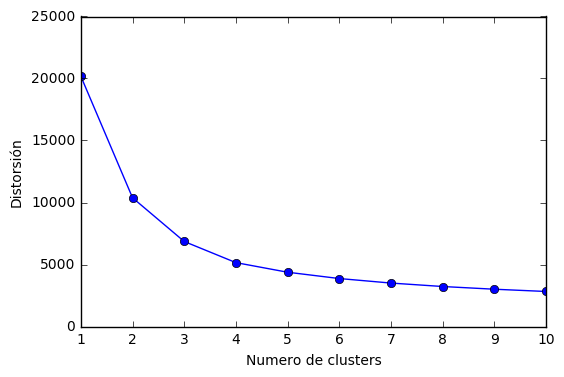

In [73]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [74]:
clusters = KMeans(n_clusters=4,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0) 

In [75]:
y_km = clusters.fit_predict(X)
y_km

array([3, 3, 3, ..., 3, 3, 0])

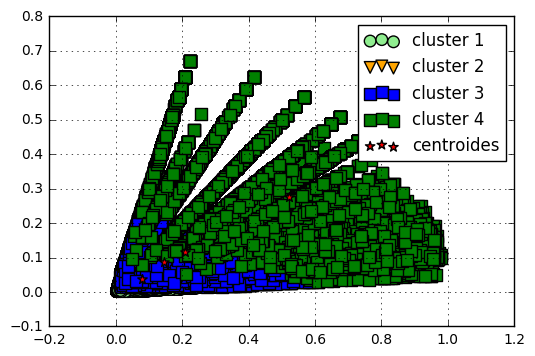

In [76]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

## Aplicando PCA KMeans

In [77]:
from sklearn import decomposition

In [78]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

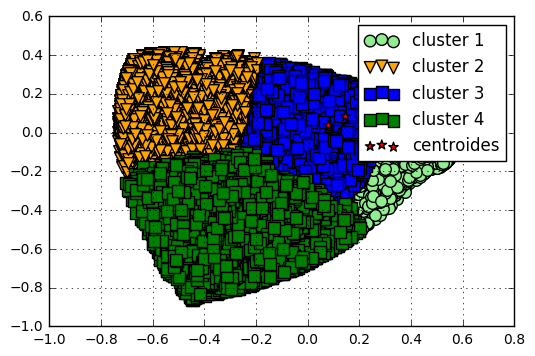

In [79]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

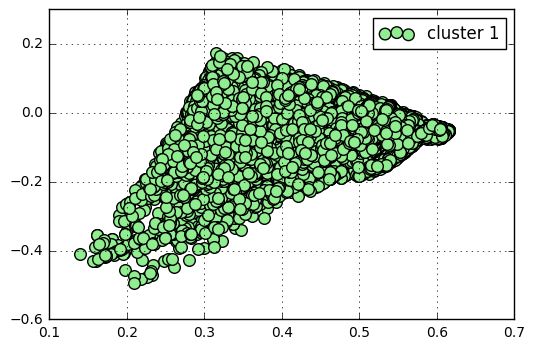

In [80]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.legend()
plt.grid()
plt.show()

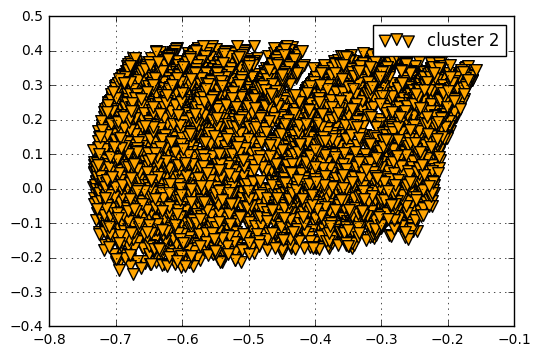

In [81]:
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.legend()
plt.grid()
plt.show()

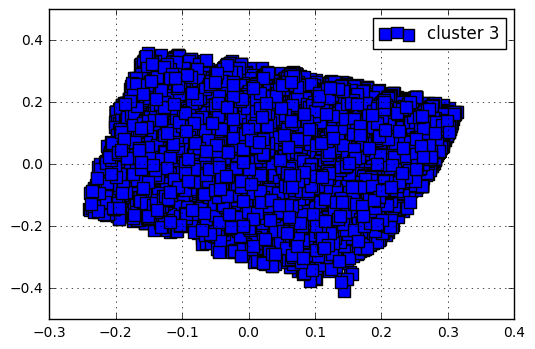

In [82]:
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.legend()
plt.grid()
plt.show()

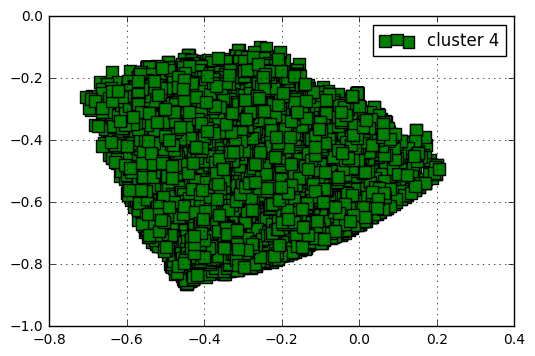

In [83]:
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.legend()
plt.grid()
plt.show()

# Norm - PCA - KMeans

In [118]:
X = pnd.read_csv("viviendas2015-clean.csv")
X.head()

,Unnamed: 0,Unnamed: 0.1,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun
0,0,0,5,2,1,1,1,1,1,4,1,1,1,1
1,1,1,1,3,1,1,1,1,1,7,1,1,1,1
2,2,2,3,3,1,1,1,1,1,8,1,1,1,1
3,3,3,4,3,1,1,1,1,1,5,1,1,1,1
4,4,4,5,3,1,1,1,1,1,6,1,1,1,1


In [119]:
X.drop('Unnamed: 0', 1, inplace=True)
X.drop('Unnamed: 0.1', 1, inplace=True)

## normalizamos

In [120]:
X = sk.preprocessing.normalize(X, norm='l2', axis=1, copy=True)

## Aplicando PCA

In [121]:
from sklearn import decomposition

In [122]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

## KMeans

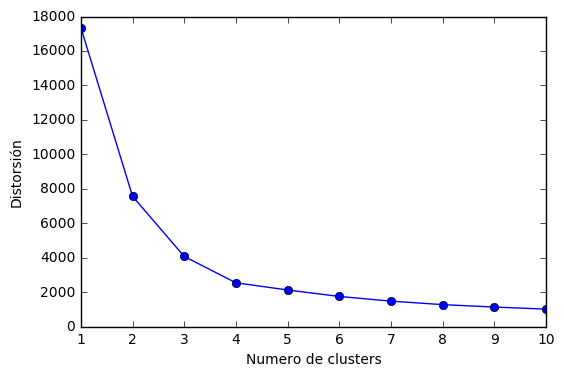

In [123]:
distortions = []

for i in range(1,11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Distorsión')
plt.show()

In [124]:
clusters = KMeans(n_clusters=4,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0) 

In [125]:
y_km = clusters.fit_predict(X)
y_km

array([2, 2, 2, ..., 2, 2, 3])

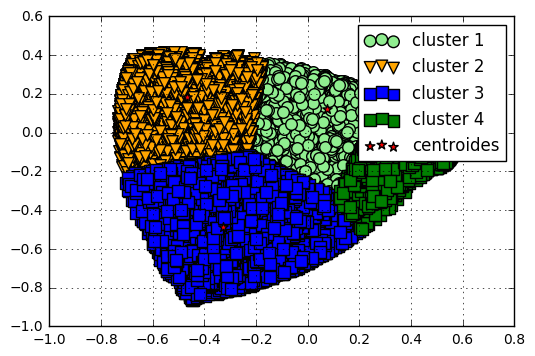

In [126]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='s',
          label='cluster 3')
plt.scatter(X[y_km==3,0],
          X[y_km==3,1],
          s=70,
          c='green',
          edgecolor='black',
          marker='s',
          label='cluster 4')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

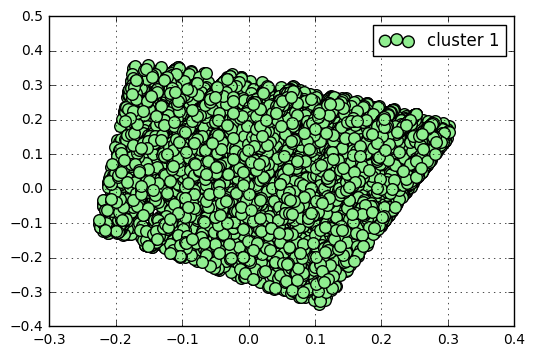

In [127]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.legend()
plt.grid()
plt.show()

## agregando columna nueva

In [93]:
X = pnd.read_csv("viviendas2015-clean.csv")
X.head()

,Unnamed: 0,Unnamed: 0.1,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun
0,0,0,5,2,1,1,1,1,1,4,1,1,1,1
1,1,1,1,3,1,1,1,1,1,7,1,1,1,1
2,2,2,3,3,1,1,1,1,1,8,1,1,1,1
3,3,3,4,3,1,1,1,1,1,5,1,1,1,1
4,4,4,5,3,1,1,1,1,1,6,1,1,1,1


In [94]:
X.drop('Unnamed: 0', 1, inplace=True)
X.drop('Unnamed: 0.1', 1, inplace=True)

In [95]:
X['Cluster'] = y_km

In [96]:
X.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun,Cluster
0,5,2,1,1,1,1,1,4,1,1,1,1,2
1,1,3,1,1,1,1,1,7,1,1,1,1,2
2,3,3,1,1,1,1,1,8,1,1,1,1,2
3,4,3,1,1,1,1,1,5,1,1,1,1,2
4,5,3,1,1,1,1,1,6,1,1,1,1,2


In [97]:
pnd.unique(y_km)

array([2, 3, 0, 1], dtype=int64)

In [98]:
X.to_csv('viviendas_2015_clusters.csv')

# Aplicando MeanShift

In [99]:
X = pnd.read_csv("viviendas2015-clean.csv")
X.head()

,Unnamed: 0,Unnamed: 0.1,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun
0,0,0,5,2,1,1,1,1,1,4,1,1,1,1
1,1,1,1,3,1,1,1,1,1,7,1,1,1,1
2,2,2,3,3,1,1,1,1,1,8,1,1,1,1
3,3,3,4,3,1,1,1,1,1,5,1,1,1,1
4,4,4,5,3,1,1,1,1,1,6,1,1,1,1


In [100]:
X.drop('Unnamed: 0', 1, inplace=True)
X.drop('Unnamed: 0.1', 1, inplace=True)

In [101]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [102]:
X = X.sample(frac=0.05, random_state=1)
X.head()

,VIV_SEL,P1_1,P1_2,P1_3,P1_4,P1_5_1,P1_5_2,P2_1,P2_2,P2_3,cve_est,cve_mun
46402,5,2,2,1,1,1,2,3,1,1,21,114
31399,8,3,1,1,1,1,1,5,1,1,14,77
56057,6,2,3,2,1,1,1,5,1,1,25,6
3519,11,2,5,2,1,1,2,4,1,1,1,1
47776,4,3,1,1,1,1,1,4,1,1,22,14


In [103]:
X = sk.preprocessing.normalize(X, norm='l2', axis=1, copy=True)

In [104]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)

In [105]:
bandwidth = estimate_bandwidth(X, quantile=0.3)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


In [106]:
import matplotlib.pyplot as plt
from itertools import cycle

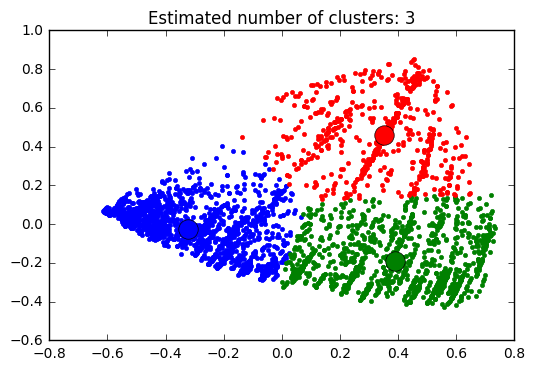

In [107]:
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [109]:
clusters = KMeans(n_clusters=3,
                    init='k-means++', 
                    max_iter=300,
                    tol=1e-04,
                    n_init=10,
                    random_state=0) 

In [110]:
y_km = clusters.fit_predict(X)
y_km

array([1, 1, 2, ..., 1, 1, 1])

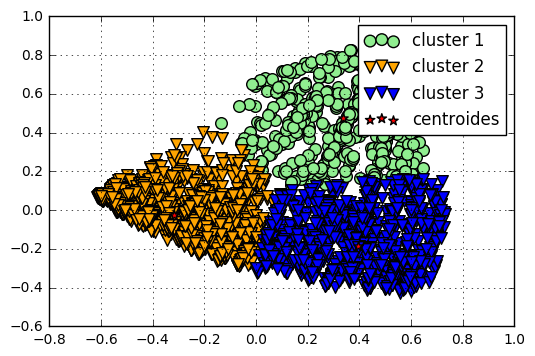

In [113]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='v',
          label='cluster 3')
plt.scatter(clusters.cluster_centers_[:,0],
          clusters.cluster_centers_[:,1],
          s=50,
          c='red',
          marker='*',
          label='centroides')

plt.legend()
plt.grid()
plt.show()

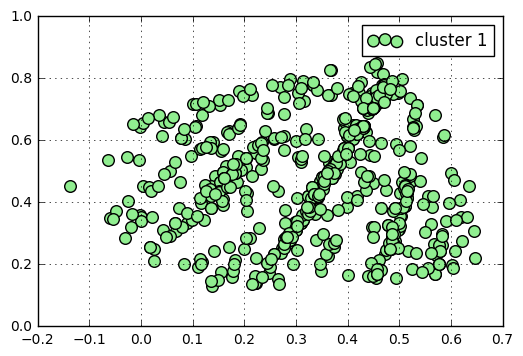

In [114]:
plt.scatter(X[y_km==0,0],
          X[y_km==0,1],
          s=70,
          c='lightgreen',
          edgecolor='black',
          marker='o',
          label='cluster 1')
plt.legend()
plt.grid()
plt.show()

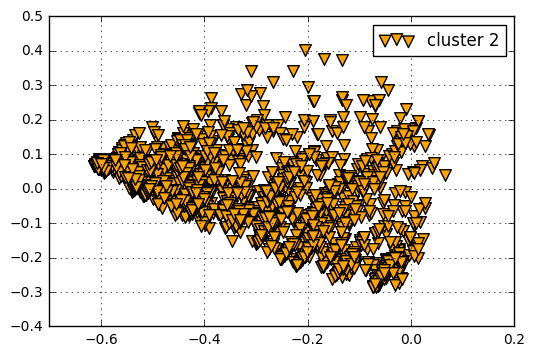

In [116]:
plt.scatter(X[y_km==1,0],
          X[y_km==1,1],
          s=70,
          c='orange',
          edgecolor='black',
          marker='v',
          label='cluster 2')
plt.legend()
plt.grid()
plt.show()

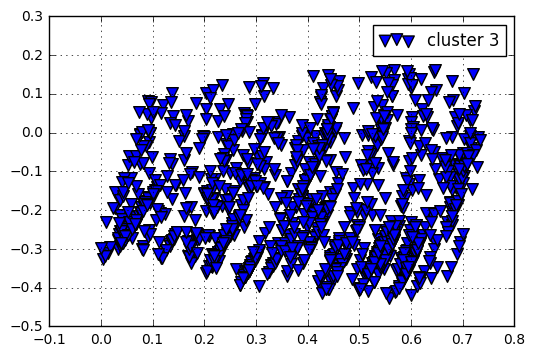

In [117]:
plt.scatter(X[y_km==2,0],
          X[y_km==2,1],
          s=70,
          c='blue',
          edgecolor='black',
          marker='v',
          label='cluster 3')
plt.legend()
plt.grid()
plt.show()